In [ ]:
https://programmers.co.kr/learn/courses/30/lessons/43238

n	times	return
6	[7, 10]	28

In [ ]:
def solution(n, times):
    for i in range(1, n):
        

imdb 데이터셋 예제

In [12]:
from tensorflow.keras.preprocessing import sequence
from tensorflow.keras.datasets import imdb
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense, Flatten, Embedding
from tensorflow.keras import preprocessing

import numpy
import tensorflow as tf

#seed 값 설정
#seed = 0
#numpy.random.seed(seed)
#tf.random.set.seed(3)

#학습셋, 테스트셋 지정하기
(x_train, y_train),(x_test, y_test) = imdb.load_data(num_words = 5000)

#데이터 전처리
x_train = sequence.pad_sequences(x_train, maxlen = 100)
x_test = sequence.pad_sequences(x_test, maxlen = 100)

In [13]:
print(x_train[5,:], y_train[5:,])
print(x_test[5,:], y_test[5,:])

[   0    0    0    0    0    0    0    0    0    0    0    0    0    0
    0    0    0    0    0    0    0    0    0    0    0    0    0    0
    0    0    0    0    0    0    0    0    0    0    0    0    0    0
    0    0    0    0    0    0    0    0    0    0    0    0    0    0
    0    1  778  128   74   12  630  163   15    4 1766    2 1051    2
   32   85  156   45   40  148  139  121  664  665   10   10 1361  173
    4  749    2   16 3804    8    4  226   65   12   43  127   24    2
   10   10] [0 1 0 ... 0 1 0]


IndexError: too many indices for array: array is 1-dimensional, but 2 were indexed

In [16]:
#모델 만들기
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense, Dropout, Activation
from tensorflow.keras.layers import Embedding
from tensorflow.keras.layers import LSTM
from tensorflow.keras.layers import Conv1D, MaxPooling1D

model = Sequential()
model.add(Embedding(input_dim = 5000, output_dim = 100)) #차원을 줄인다. 
model.add(Dropout(0.5))   
#오버피팅을 줄인다. 
model.add(Conv1D(64, 5, padding = 'valid', activation = 'relu', strides = 1))
#단어들의 중요도를 판단해 의미있는 단어들의 특징들을 뽑아낸다. 
model.add(MaxPooling1D(pool_size = 4))
# 1/4로 줄인다. 
model.add(LSTM(55))
model.add(Dense(1))
model.add(Activation('sigmoid'))
model.summary()

#모델의 컴파일
model.compile(loss = 'binary_crossentropy',
             optimizer = 'adam',
             metrics = ['accuracy'])

ModuleNotFoundError: No module named 'tensorflow'

In [17]:
history = model.fit(x_train, y_train, batch_size = 100, epochs = 50,
                   validation_data = (x_test, y_test))

Epoch 1/50
250/250 [==============================] - 14s 54ms/step - loss: 0.4540 - accuracy: 0.7734 - val_loss: 0.3451 - val_accuracy: 0.8425
Epoch 2/50
250/250 [==============================] - 13s 52ms/step - loss: 0.2951 - accuracy: 0.8768 - val_loss: 0.3574 - val_accuracy: 0.8432
Epoch 3/50
250/250 [==============================] - 13s 52ms/step - loss: 0.2489 - accuracy: 0.9013 - val_loss: 0.3386 - val_accuracy: 0.8522
Epoch 4/50
250/250 [==============================] - 13s 51ms/step - loss: 0.2155 - accuracy: 0.9146 - val_loss: 0.3539 - val_accuracy: 0.8520
Epoch 5/50
250/250 [==============================] - 13s 52ms/step - loss: 0.1839 - accuracy: 0.9276 - val_loss: 0.3620 - val_accuracy: 0.8543
Epoch 6/50
250/250 [==============================] - 13s 52ms/step - loss: 0.1514 - accuracy: 0.9430 - val_loss: 0.3925 - val_accuracy: 0.8484
Epoch 7/50
250/250 [==============================] - 13s 52ms/step - loss: 0.1263 - accuracy: 0.9531 - val_loss: 0.4429 - val_accuracy:

In [21]:
import numpy as np
x = np.array([[1,2,3],[2,3,4],[4,5,6],[3,4,5],[4,5,6],[5,6,7]])
y = np.array([4,5,6,7,8])

raw_data = np.array([1,2,3,4,5,6,7,8])

In [27]:
model = Sequential()
model.add(LSTM(10, activation = 'relu', input_shape= (3,1)))
model.add(Dense(5, activation = 'relu'))
model.add(Dense(1, activation = 'relu'))

model.summary()

Model: "sequential_7"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
lstm_6 (LSTM)                (None, 10)                480       
_________________________________________________________________
dense_6 (Dense)              (None, 5)                 55        
_________________________________________________________________
dense_7 (Dense)              (None, 1)                 6         
Total params: 541
Trainable params: 541
Non-trainable params: 0
_________________________________________________________________


In [28]:
model.compile(optimizer = 'adam',loss = 'mse')
x_input = x.reshape((-1,3,1))
model.fit(x_input, y, epochs = 10000, batch_size =1, verbose = 0)

y_hat = model.predict([[[8],[9],[10]]])
print(y_hat)

ValueError: Data cardinality is ambiguous:
  x sizes: 6
  y sizes: 5
Please provide data which shares the same first dimension.

모델 만들기

[0.40160273 0.33448216 0.2550371  0.42960505 0.54203345 0.75649014
 0.82426923 0.65040557 0.5711837  0.58553881 0.4630838  0.37170501
 0.39644254 0.3624839  0.72397711 0.86075803 0.48138398 0.55676057
 0.64855247 0.64359359 0.29000554 0.         0.47680482 0.82535245
 0.75590889 0.82644051 0.56073214 0.46181926 0.66050757 0.68499427
 0.60608427 0.00773071 0.19390357 0.46548435 0.56494268 0.43252691
 0.26025608 0.49403699 0.4824472  0.54641672 0.60572704 1.
 0.67629467 0.43189044 0.32231853 0.63027556 0.63355751 0.4186323
 0.68833549 0.41932664 0.41900044 0.15944577 0.67236957 0.81320102
 0.95283755 0.94269349 0.49941507 0.26179418 0.28839411 0.37559702
 0.58758042 0.65839472 0.46471949 0.1000025  0.1884854  0.54737288
 0.64639981 0.84172234 0.60110939 0.20952573 0.13239344 0.64869623
 0.67245234 0.38324134 0.49855104 0.40506692 0.35432807 0.29751062
 0.3006426  0.42264101 0.57225329 0.10508642 0.44468705 0.83441295
 0.7765112  0.64990411 0.61518239 0.28309313 0.51226536 0.16462032
 0.2

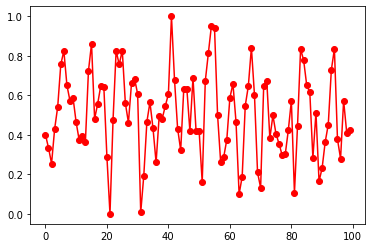

In [11]:
import matplotlib.pyplot as plt
np.random.seed(777)
x = np.random.normal(0,1,100)
e = np.random.normal(0,1,100)

x[2] = 0.5*x[1]-0.3*x[0]+e[2]
for i in range(2, 100):
    x[i] = 0.5*x[i-1]-0.3*x[i-2]+e[i]
    
x = (x-min(x))/(max(x)-min(x))
print(x) 
plt.plot(range(100), x, 'ro-')
plt.show()

In [13]:
x_data = []
y_data = []

window_size = 10

for i in range(len(x) - window_size):
    temp = x[i:i+window_size]
    x_data.append(temp)
    y_data.append(x[i+window_size])
    
x_data = np.array(x_data)
y_data = np.array(y_data)
print(x_data)
print(y_data)
        

[[0.40160273 0.33448216 0.2550371  0.42960505 0.54203345 0.75649014
  0.82426923 0.65040557 0.5711837  0.58553881]
 [0.33448216 0.2550371  0.42960505 0.54203345 0.75649014 0.82426923
  0.65040557 0.5711837  0.58553881 0.4630838 ]
 [0.2550371  0.42960505 0.54203345 0.75649014 0.82426923 0.65040557
  0.5711837  0.58553881 0.4630838  0.37170501]
 [0.42960505 0.54203345 0.75649014 0.82426923 0.65040557 0.5711837
  0.58553881 0.4630838  0.37170501 0.39644254]
 [0.54203345 0.75649014 0.82426923 0.65040557 0.5711837  0.58553881
  0.4630838  0.37170501 0.39644254 0.3624839 ]
 [0.75649014 0.82426923 0.65040557 0.5711837  0.58553881 0.4630838
  0.37170501 0.39644254 0.3624839  0.72397711]
 [0.82426923 0.65040557 0.5711837  0.58553881 0.4630838  0.37170501
  0.39644254 0.3624839  0.72397711 0.86075803]
 [0.65040557 0.5711837  0.58553881 0.4630838  0.37170501 0.39644254
  0.3624839  0.72397711 0.86075803 0.48138398]
 [0.5711837  0.58553881 0.4630838  0.37170501 0.39644254 0.3624839
  0.72397711 0.

In [14]:
print(x_data.shape, y_data.shape)

(90, 10) (90,)


In [19]:
from tensorflow.keras.models import Sequential

model = Sequential()
model.add(LSTM(10, return_sequences=True, input_shape = (10,1)))
model.add(LSTM(100))
model.add(Dense(50, activation = 'relu'))
model.add(Dense(1, activation = 'sigmoid'))

odel.summary()

ModuleNotFoundError: No module named 'tensorflow'

In [2]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

데이터 길이: 92 
 앞쪽 5개 값 [[54458.03781142]
 [56915.17393505]
 [57636.75796197]
 [57306.16626299]
 [60743.04182491]]


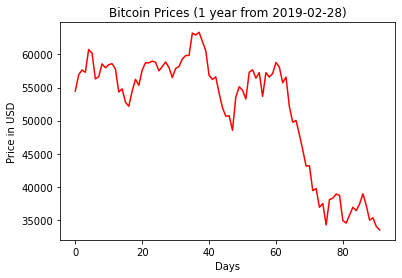

In [9]:
f = open("BTC_USD_2021-03-10_2021-06-09-CoinDesk.csv", 'r')
coindesk_data = pd.read_csv(f, header = 0)
seq = coindesk_data[['Closing Price (USD)']].to_numpy()
print("데이터 길이:", len(seq), '\n 앞쪽 5개 값', seq[0:5])

plt.plot(seq, color = 'red')
plt.title("Bitcoin Prices (1 year from 2019-02-28)")
plt.xlabel('Days'); plt.ylabel("Price in USD")
plt.show()

In [1]:
from tensorflow.keras.datasets import mnist

In [6]:
(x_data, y_data), (x_test, y_test) = mnist.load_data()

In [15]:
from tensorflow.keras.preprocessing import sequence
from tensorflow.keras.datasets import imdb
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense, Flatten, Embedding, LSTM
from tensorflow.keras import preprocessing
from tensorflow.keras.callbacks import EarlyStopping

import numpy
import tensorflow as tf

In [24]:
print(x_data.shape, x_test.shape)


early = EarlyStopping(monitor = "val_accuracy", patience = 5)
4000,28,28 -> 28,28,16
#모델설계
model = Sequential()
model.add(LSTM(15, input_shape=(28,28)))
model.add(Dense(3, activation = 'relu'))
model.add(Dense(1, activation = 'sigmoid'))
model.summary()

(60000, 28, 28) (10000, 28, 28)
Model: "sequential_5"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
lstm_4 (LSTM)                (None, 15)                2640      
_________________________________________________________________
dense_6 (Dense)              (None, 3)                 48        
_________________________________________________________________
dense_7 (Dense)              (None, 1)                 4         
Total params: 2,692
Trainable params: 2,692
Non-trainable params: 0
_________________________________________________________________


In [25]:
# 모델학습
model.compile(loss='binary_crossentropy', optimizer = 'Adam', metrics = ['accuracy'])
his = model.fit(x_data, y_data, epochs = 20, batch_size = 64, verbose = 2, callbacks = [early])

Epoch 1/20
938/938 - 28s - loss: -1.0165e+02 - accuracy: 0.1111
Epoch 2/20
938/938 - 26s - loss: -3.9336e+02 - accuracy: 0.1124
Epoch 3/20
938/938 - 13s - loss: -8.4302e+02 - accuracy: 0.1124
Epoch 4/20
938/938 - 16s - loss: -1.4329e+03 - accuracy: 0.1124
Epoch 5/20
938/938 - 18s - loss: -2.1474e+03 - accuracy: 0.1124
Epoch 6/20
938/938 - 18s - loss: -2.9781e+03 - accuracy: 0.1124
Epoch 7/20
938/938 - 18s - loss: -3.9188e+03 - accuracy: 0.1124
Epoch 8/20
938/938 - 18s - loss: -4.9674e+03 - accuracy: 0.1124
Epoch 9/20
938/938 - 18s - loss: -6.1222e+03 - accuracy: 0.1124
Epoch 10/20
938/938 - 18s - loss: -7.3818e+03 - accuracy: 0.1124
Epoch 11/20
938/938 - 18s - loss: -8.7452e+03 - accuracy: 0.1124
Epoch 12/20
938/938 - 18s - loss: -1.0211e+04 - accuracy: 0.1124
Epoch 13/20
938/938 - 18s - loss: -1.1783e+04 - accuracy: 0.1124
Epoch 14/20
938/938 - 18s - loss: -1.3459e+04 - accuracy: 0.1124
Epoch 15/20
938/938 - 18s - loss: -1.5236e+04 - accuracy: 0.1124
Epoch 16/20
938/938 - 15s - loss: 

In [26]:
#모델 평가
res = model.evaluate(x_test, y_test, verbose = 0)
print("정확률은", res[1]*100)

import matplotlib.pyplot as plt

정확률은 12.210000306367874


KeyError: 'val_accuracy'

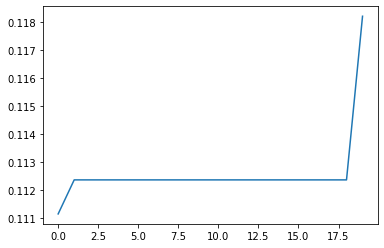

In [27]:
plt.plot(his.history['accuracy'])
plt.plot(his.history['val_accuracy'])
plt.title("Model accuracy")
plt.ylabel("Accuracy")
plt.xlabel("Epoch")
plt.legend(['Train', 'Validation'], loc = 'best')
plt.grid()
plt.show()